In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = np.loadtxt("Blood_fat.csv", delimiter=",")

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

a1 = tf.Variable(tf.random.uniform([1], 0, 2, dtype=tf.float64 ,seed=0))
a2 = tf.Variable(tf.random.uniform([1], 0, 6, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype=tf.float64, seed=0))

y = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
learning_rate = 0.001
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_descent)
        if step % 100 == 0:
            print(f"Epoch: {step}, rmse: {sess.run(rmse)}, a1: {sess.run(a1)}, a2: {sess.run(a2)}, b: {sess.run(b)}")
        if step == epoch - 1:
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)
            print(type(da1))

calc_y = []
for i in range(25):
    new_y = (da1 * x1[i]) + (da2 * x2[i]) + db
    calc_y.append(new_y.item())
    print(new_y.item())
            
tf.Session

Epoch: 0, rmse: 78.09026671217049, a1: [1.55346763], a2: [4.80836229], b: [80.68928208]
Epoch: 100, rmse: 42.07734404621676, a1: [0.73822014], a2: [4.5893448], b: [80.67876365]
Epoch: 200, rmse: 41.78298966958412, a1: [0.65319333], a2: [4.73789734], b: [80.67833419]
Epoch: 300, rmse: 41.612168407345564, a1: [0.58842705], a2: [4.85105343], b: [80.67796271]
Epoch: 400, rmse: 41.51373484825786, a1: [0.53926593], a2: [4.93694614], b: [80.67763608]
Epoch: 500, rmse: 41.45724797631836, a1: [0.50202643], a2: [5.0020109], b: [80.67734382]
Epoch: 600, rmse: 41.42491007897393, a1: [0.47385108], a2: [5.05123991], b: [80.67707775]
Epoch: 700, rmse: 41.40642256815054, a1: [0.45254831], a2: [5.08846201], b: [80.67683159]
Epoch: 800, rmse: 41.39586158957648, a1: [0.43644818], a2: [5.11659471], b: [80.67660052]
Epoch: 900, rmse: 41.38983130487811, a1: [0.42428292], a2: [5.13785288], b: [80.67638088]
Epoch: 1000, rmse: 41.38638885985676, a1: [0.41509216], a2: [5.1539144], b: [80.67616988]
Epoch: 1100, 

tensorflow.python.client.session.Session

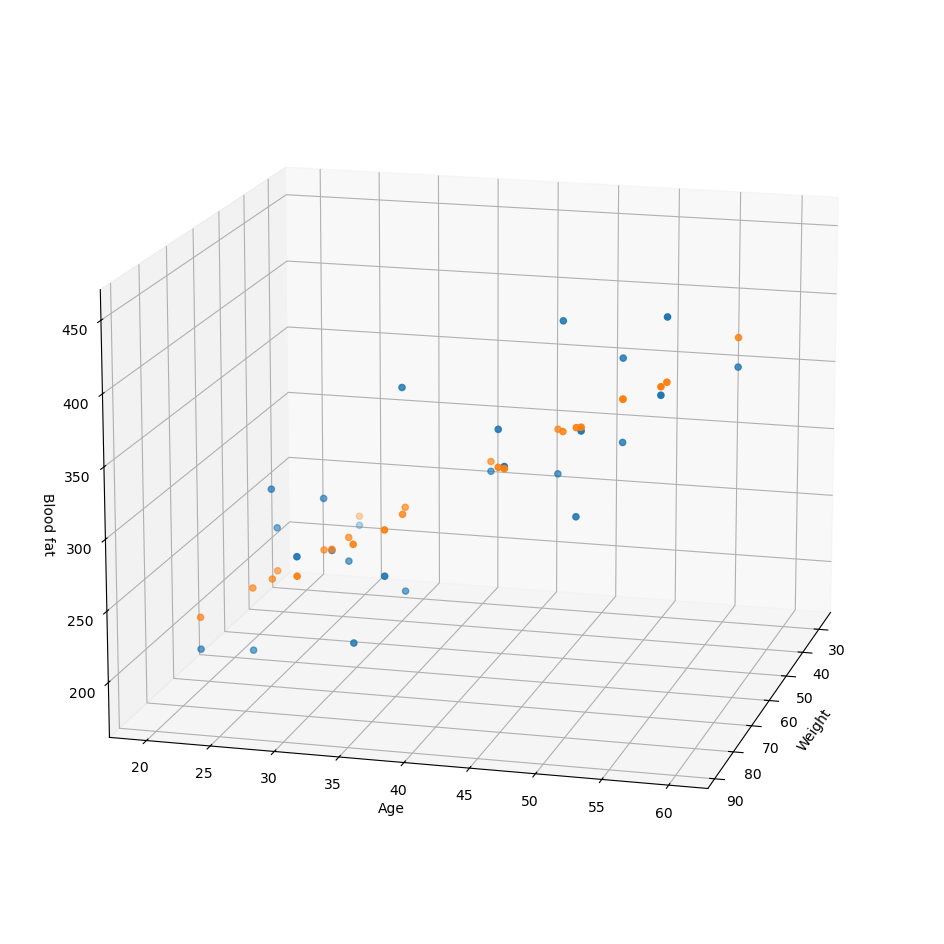

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, x2, y_data, 'b')
ax.scatter(x1, x2, calc_y, 'r')
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()